In [5]:
%load_ext sql
%sql sqlite:///CourseDataWarehouse2.db

'Connected: @CourseDataWarehouse2.db'

In [6]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
conn = sqlite3.connect('CourseData.db')
connWH = sqlite3.connect('CourseDataWarehouse2.db')

In [7]:
%%sql 
DROP TABLE IF EXISTS PROGRAMS_WH;
DROP TABLE IF EXISTS LOCATIONS_WH;
DROP TABLE IF EXISTS TIMES_WH;
DROP TABLE IF EXISTS FACULTY_WH;
DROP TABLE IF EXISTS CATALOGS_WH;
DROP TABLE IF EXISTS COURSES_WH;

 * sqlite:///CourseDataWarehouse2.db
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [8]:
%%sql
CREATE TABLE PROGRAMS_WH (
    PID INTEGER NOT NULL PRIMARY KEY,
    program_name TEXT NOT NULL,
    program_code VARCHAR NOT NULL
);

 * sqlite:///CourseDataWarehouse2.db
Done.


[]

In [9]:
%%sql
CREATE TABLE LOCATIONS_WH (
    LID INTEGER PRIMARY KEY,
    LName VARCHAR
);

 * sqlite:///CourseDataWarehouse2.db
Done.


[]

In [10]:
%%sql 
CREATE TABLE TIMES_WH (
    TID INTEGER NOT NULL PRIMARY KEY,
    Day TEXT NOT NULL,
    Start TEXT NOT NULL,
    End TEXT NOT NULL,   
    Term TEXT NOT NULL
);

 * sqlite:///CourseDataWarehouse2.db
Done.


[]

In [11]:
%%sql 
CREATE TABLE FACULTY_WH (
    FID  INTEGER NOT NULL PRIMARY KEY,
    FName TEXT NOT NULL
);

 * sqlite:///CourseDataWarehouse2.db
Done.


[]

In [12]:
%%sql
CREATE TABLE CATALOGS_WH (
    CatID INTEGER PRIMARY KEY,
    CourseCode VARCHAR NOT NULL,
    Credits TEXT NOT NULL,
    Prereqs TEXT,
    Coreqs TEXT,
    Fees INTEGER,
    Description TEXT,
    Attributes TEXT
);

 * sqlite:///CourseDataWarehouse2.db
Done.


[]

In [13]:
%%sql
CREATE TABLE COURSES_WH (
    CID INTEGER PRIMARY KEY,
    CRN INTEGER NOT NULL,
    Title TEXT NOT NULL,
    Section VARCHAR NOT NULL,
    Act INTEGER,
    Cap INTEGER,
    Rem INTEGER, 
    AvgCap INTEGER,
    NumClasses INTEGER,
    PID INTEGER NOT NULL,
    LID INTEGER NOT NULL,
    TID INTEGER NOT NULL,
    FID INTEGER NOT NULL,
    CatID INTEGER NOT NULL,
    FOREIGN KEY (PID) REFERENCES PROGRAMS (PID),
    FOREIGN KEY (LID) REFERENCES LOCATIONS (LID),
    FOREIGN KEY (TID) REFERENCES TIMES (TID),
    FOREIGN KEY (FID) REFERENCES FACULTY (FID),
    FOREIGN KEY (CatID) REFERENCES CATALOGS (CatID)
);

 * sqlite:///CourseDataWarehouse2.db
Done.


[]

In [14]:
programs = 'SELECT * FROM PROGRAMS'
df_p = pd.read_sql(programs, conn)
df_p.head()

,PID,program_name,program_code
0,1,Asian Studies,AN
1,2,Business,BU
2,3,Black Studies,BL
3,4,Bioengineering,BEN
4,5,Arabic,AR


In [15]:
df_p.to_sql('PROGRAMS_WH', connWH)

ValueError: Table 'PROGRAMS_WH' already exists.

In [19]:
locations = 'SELECT DISTINCT location FROM COURSE_MEETINGS'
df_l = pd.read_sql(locations, conn)
df_l.head()

,location
0,DSB 105
1,DSB 111
2,DSB 110A
3,DSB 108
4,DSB 110B


In [ ]:
df_l.to_sql('LOCATIONS_WH', connWH, index_label='LID')

In [ ]:
%%sql
SELECT *
FROM LOCATIONS_WH
LIMIT 10;

In [20]:
times = 'SELECT DISTINCT day, Start, End, term FROM COURSE_MEETINGS'
df_t = pd.read_sql(times, conn)
df_t.head()

,day,Start,End,term
0,T,2014-09-02T08:00:00,2014-09-02T09:15:00,Fall2014
1,F,2014-09-05T08:00:00,2014-09-05T09:15:00,Fall2014
2,T,2014-09-09T08:00:00,2014-09-09T09:15:00,Fall2014
3,F,2014-09-12T08:00:00,2014-09-12T09:15:00,Fall2014
4,T,2014-09-16T08:00:00,2014-09-16T09:15:00,Fall2014


In [ ]:
df_t.to_sql('TIMES_WH', connWH, index_label='TID')

In [21]:
faculty = 'SELECT DISTINCT FName FROM FACULTY'
df_f = pd.read_sql(faculty, conn)
df_f.head()

,FName
0,Michael P. Coyne
1,Rebecca I. Bloch
2,Paul Caster
3,Jo Ann Drusbosky
4,Arleen N. Kardos


In [ ]:
df_t.to_sql('FACULTY_WH', connWH, index_label='FID')

In [22]:
catalogs = 'SELECT DISTINCT CourseCode, credits, prereqs, coreqs, fees, description, attributes FROM CATALOGS'
df_c = pd.read_sql(catalogs, conn)
df_c.head()

,CourseCode,credits,prereqs,coreqs,fees,description,attributes
0,AN 0301,1-3 Credits,None,None,None,Students undertake an individualized program o...,None
1,AN 0310,3 Credits,None,None,None,This seminar examines selected topics concerni...,None
2,BU 0211,3 Credits,Junior standing.,None,None,This course examines the broad philosophical a...,None
3,BU 0220,3 Credits,None,None,None,This course surveys issues arising out of fede...,"EVME Environmental Studies Major Elective, EVP..."
4,BU 0311,3 Credits,BU 0211.,None,None,This course examines the components of common ...,None


In [ ]:
df_c.to_sql('CATALOGS_WH', connWH, index_label='CatID')

In [23]:
courses = 'SELECT DISTINCT CRN, section, act, cap, rem FROM COURSES'
df_co = pd.read_sql(courses, conn)
df_co.head()

,CRN,section,act,cap,rem
0,70384,C01,31,0,-31
1,70385,C02,31,0,-31
2,70382,C03,31,0,-31
3,70291,C04,29,0,-29
4,70350,C05,30,0,-30


In [ ]:
df_co.to_sql('COURSES_WH', connWH, index_label='CID')

In [ ]:
%%sql
SELECT *
FROM COURSES_WH
LIMIT 10;

## Fun With Data frames

In [24]:
import pandas as pd

In [25]:
#lets look at the columns in each df
df_c.columns

Index(['CourseCode', 'credits', 'prereqs', 'coreqs', 'fees', 'description',
       'attributes'],
      dtype='object')

In [26]:
df_l.columns

Index(['location'], dtype='object')

In [27]:
df_f.columns

Index(['FName'], dtype='object')

In [28]:
df_co.columns

Index(['CRN', 'section', 'act', 'cap', 'rem'], dtype='object')

In [29]:
df_t.columns

Index(['day', 'Start', 'End', 'term'], dtype='object')

In [30]:
df_f.describe()

,FName
count,1104
unique,1104
top,Hilary Anne Bartholomay
freq,1


In [ ]:
train_f=pd.get_dummies(df_f)
train_co=pd.get_dummies(df_co)

In [ ]:
train_co.describe()

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
big= ( df_c, df_t, df_co, df_l, df_f)

In [37]:
ok= pd.concat(big, axis=1)

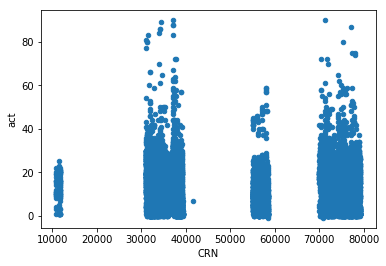

In [40]:
ok.plot.scatter('CRN', 'act')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37d9b40278>,
      dtype=object)

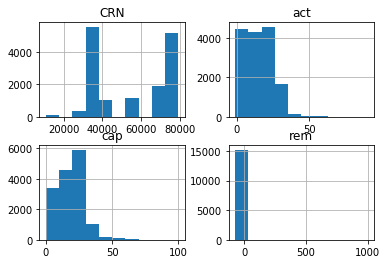

In [26]:
ok.hist()

In [27]:
ok.corr()

,CRN,act,cap,rem
CRN,1.000000,0.015324,-0.023531,-0.032081
act,0.015324,1.000000,0.767530,-0.187536
cap,-0.023531,0.767530,1.000000,0.262615
rem,-0.032081,-0.187536,0.262615,1.000000
